In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
users_parquet_path = "RefinedData/BeerAdvocate/users7.parquet"
users_ddf = pd.read_parquet(users_parquet_path)

In [22]:
users_ddf.describe()

,n_ratings,n_reviews,cfm_score,exp_score,xpl_score,adv_score,is_cfm,is_exp,is_xpl,is_adv,cfm_score_plot,exp_score_plot
count,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,57108.000000,5.710800e+04,57108.0
mean,132.140068,41.577222,-1.521565,-0.455170,0.087978,0.072911,0.100004,0.029593,0.136058,0.100004,-3.932036e-03,0.0
std,387.875528,221.338522,1.863792,0.210935,0.130990,0.125241,0.300007,0.169463,0.342853,0.300007,2.602108e-18,0.0
min,5.000000,0.000000,-63.747995,-3.542857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.932036e-03,0.0
25%,9.000000,0.000000,-1.774929,-0.525845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.932036e-03,0.0
50%,23.000000,1.000000,-1.085113,-0.413928,0.043478,0.017544,0.000000,0.000000,0.000000,0.000000,-3.932036e-03,0.0
75%,88.000000,10.000000,-0.680349,-0.331429,0.125000,0.095238,0.000000,0.000000,0.000000,0.000000,-3.932036e-03,0.0
max,12046.000000,8970.000000,-0.003932,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3.932036e-03,0.0


<AxesSubplot:xlabel='cfm_score', ylabel='Count'>

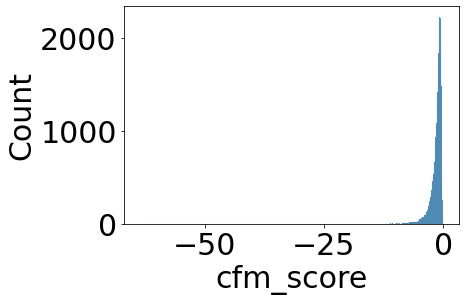

In [33]:

sns.histplot(data=users_ddf, x="cfm_score")


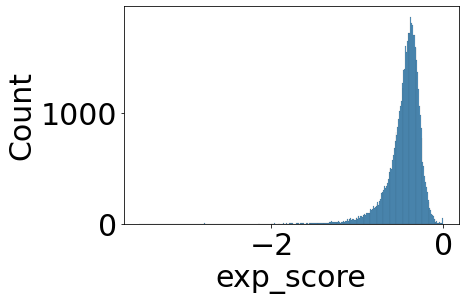

In [25]:

ax2=sns.histplot(data=users_ddf, x="exp_score")


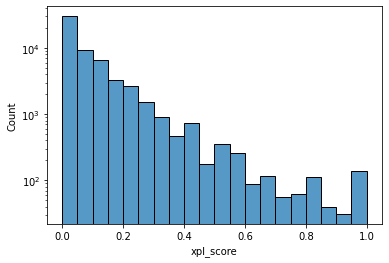

In [6]:
ax3=sns.histplot(data=users_ddf, x="xpl_score",log_scale=(False,True),bins=20)


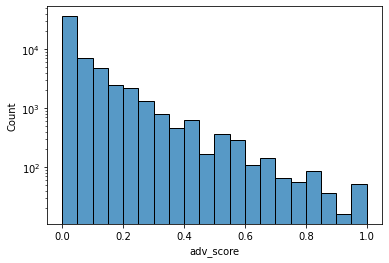

In [7]:
ax4=sns.histplot(data=users_ddf, x="adv_score",log_scale=(False,True),bins=20)

In [8]:

quantiles=np.linspace(0, len(users_ddf.n_ratings), num=21).astype('int')

In [9]:
len(users_ddf.joined)

57108

In [10]:
users_dff=users_ddf.sort_values(['n_ratings'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Percentage of chance to be Adventurer')

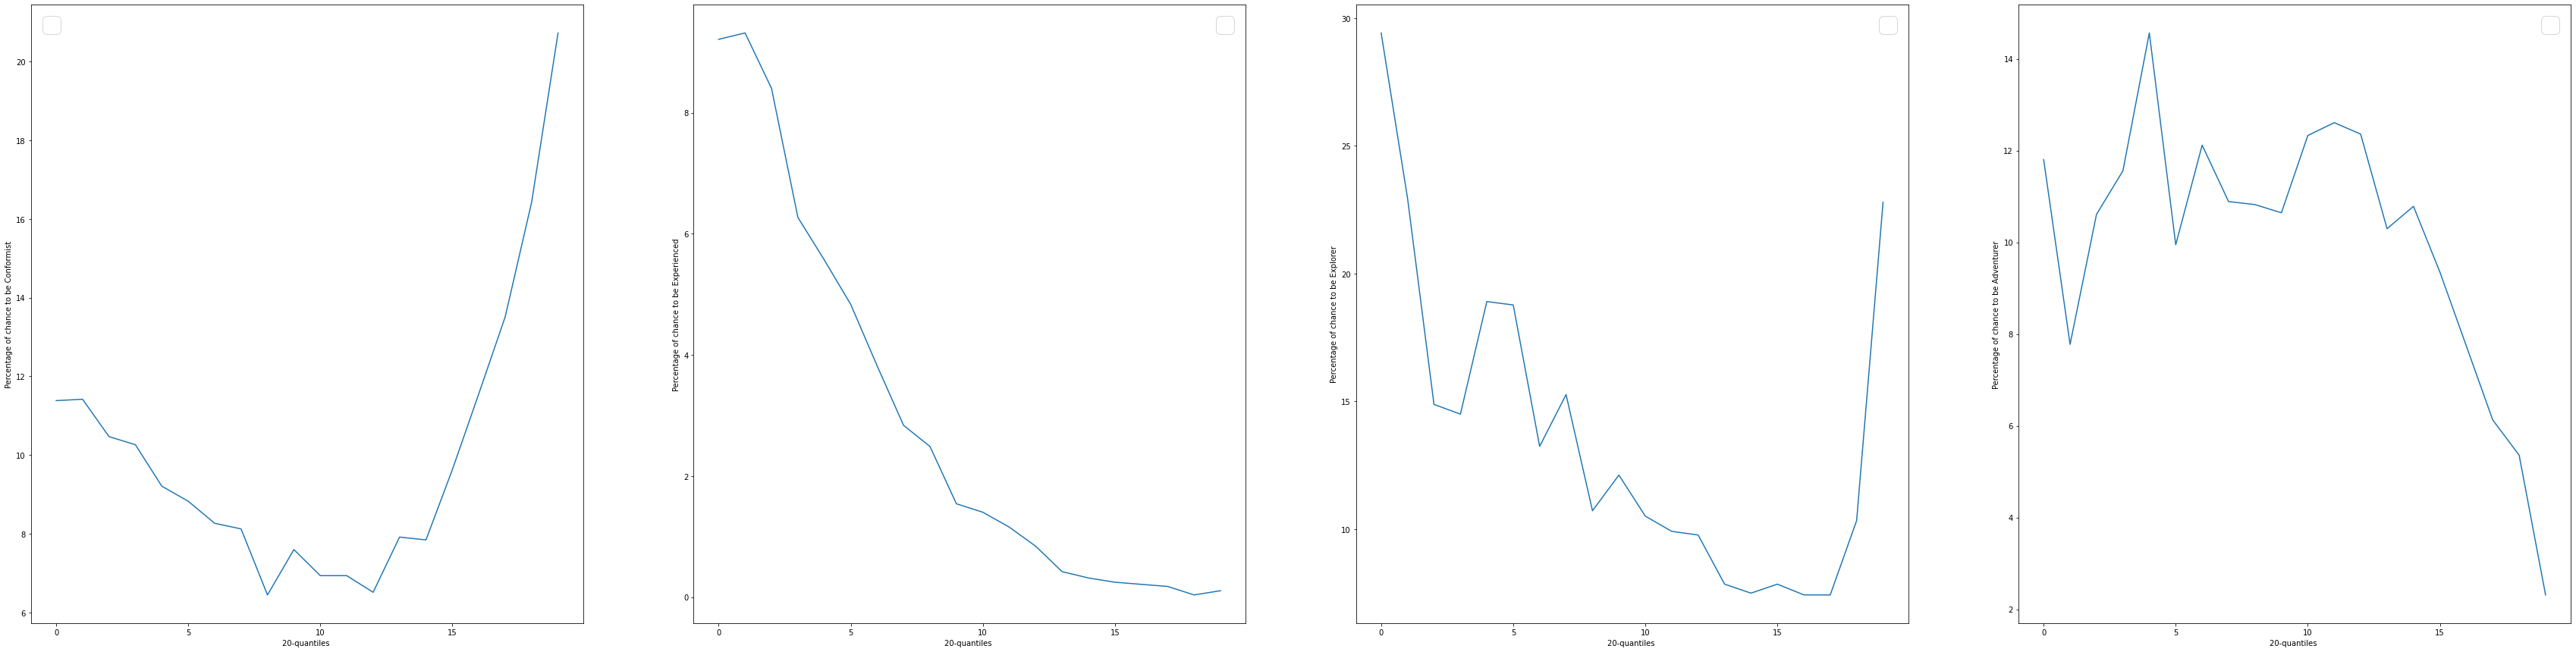

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figwidth(60)
fig.set_figheight(15)
percentages=[]
plt.rcParams.update({'font.size': 30})
for i in range(len(quantiles)-1):
    quantile=users_dff.iloc[quantiles[i]:quantiles[i+1]]
    percentages.append(quantile['is_cfm'].mean()*100)
    percentages.append(quantile['is_exp'].mean()*100)
    percentages.append(quantile['is_xpl'].mean()*100)
    percentages.append(quantile['is_adv'].mean()*100)
ax1.plot(range(len(quantiles)-1),percentages[0::4])
ax1.legend()
ax1.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax1.set_ylabel('Percentage of chance to be Conformist')

ax2.plot(range(len(quantiles)-1),percentages[1::4])
ax2.legend()
ax2.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax2.set_ylabel('Percentage of chance to be Experienced')

ax3.plot(range(len(quantiles)-1),percentages[2::4])
ax3.legend()
ax3.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax3.set_ylabel('Percentage of chance to be Explorer')

ax4.plot(range(len(quantiles)-1),percentages[3::4])
ax4.legend()
ax4.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax4.set_ylabel('Percentage of chance to be Adventurer')





In [12]:
users_dff=users_ddf.sort_values(['joined'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Percentage of chance to be Adventurer')

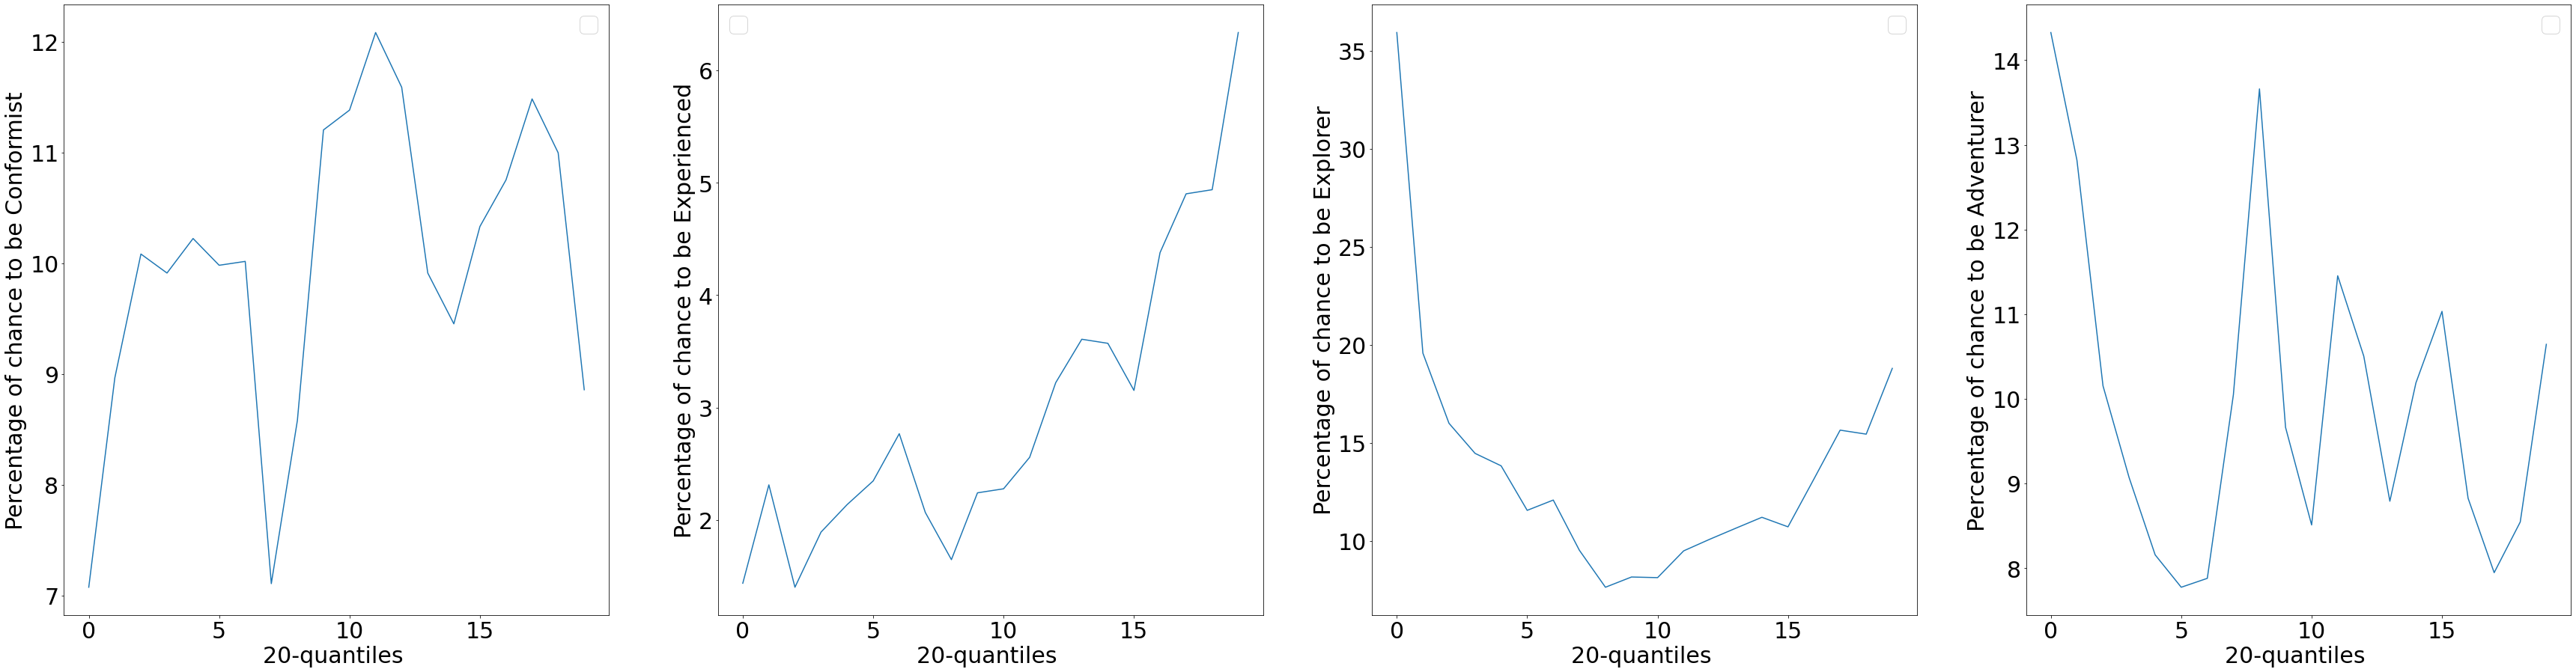

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figwidth(60)
fig.set_figheight(15)
percentages=[]
for i in range(len(quantiles)-1):
    quantile=users_dff.iloc[quantiles[i]:quantiles[i+1]]
    percentages.append(quantile['is_cfm'].mean()*100)
    percentages.append(quantile['is_exp'].mean()*100)
    percentages.append(quantile['is_xpl'].mean()*100)
    percentages.append(quantile['is_adv'].mean()*100)
ax1.plot(range(len(quantiles)-1),percentages[0::4])
ax1.legend()
ax1.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax1.set_ylabel('Percentage of chance to be Conformist')

ax2.plot(range(len(quantiles)-1),percentages[1::4])
ax2.legend()
ax2.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax2.set_ylabel('Percentage of chance to be Experienced')

ax3.plot(range(len(quantiles)-1),percentages[2::4])
ax3.legend()
ax3.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax3.set_ylabel('Percentage of chance to be Explorer')

ax4.plot(range(len(quantiles)-1),percentages[3::4])
ax4.legend()
ax4.set_xlabel(str(len(quantiles)-1)+'-quantiles ')
ax4.set_ylabel('Percentage of chance to be Adventurer')


<AxesSubplot:xlabel='cfm_score', ylabel='location'>

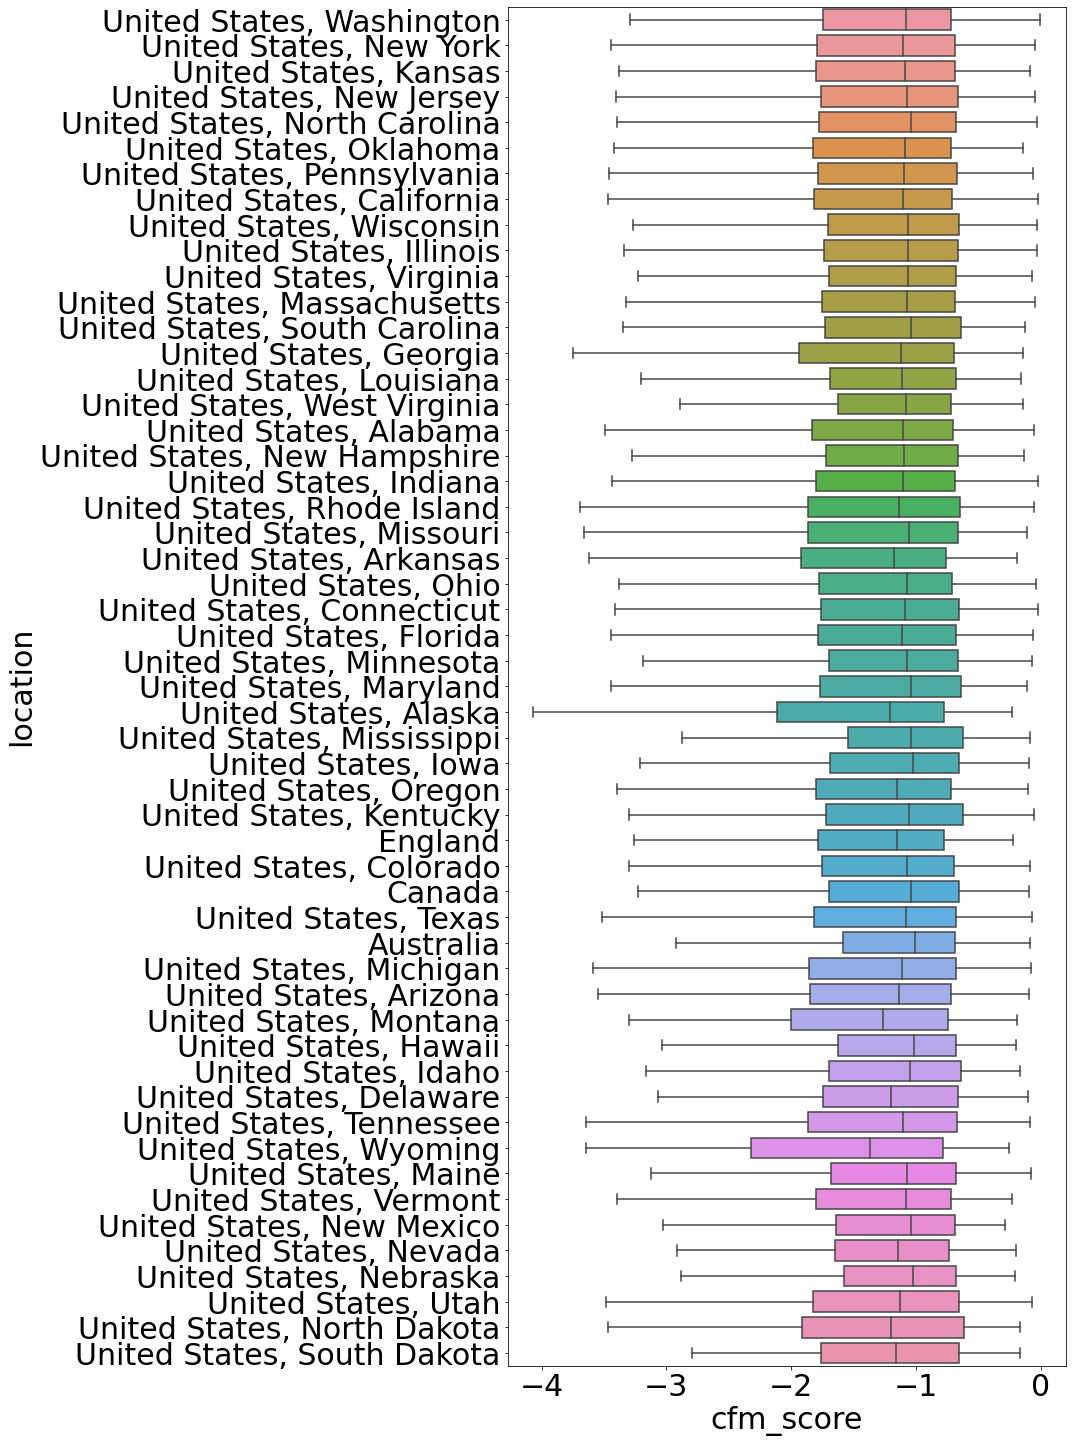

In [14]:
plt.figure(figsize=(10,25))
sns.boxplot(data=users_ddf, x="cfm_score", y="location",showfliers = False)



<AxesSubplot:xlabel='is_cfm', ylabel='location'>

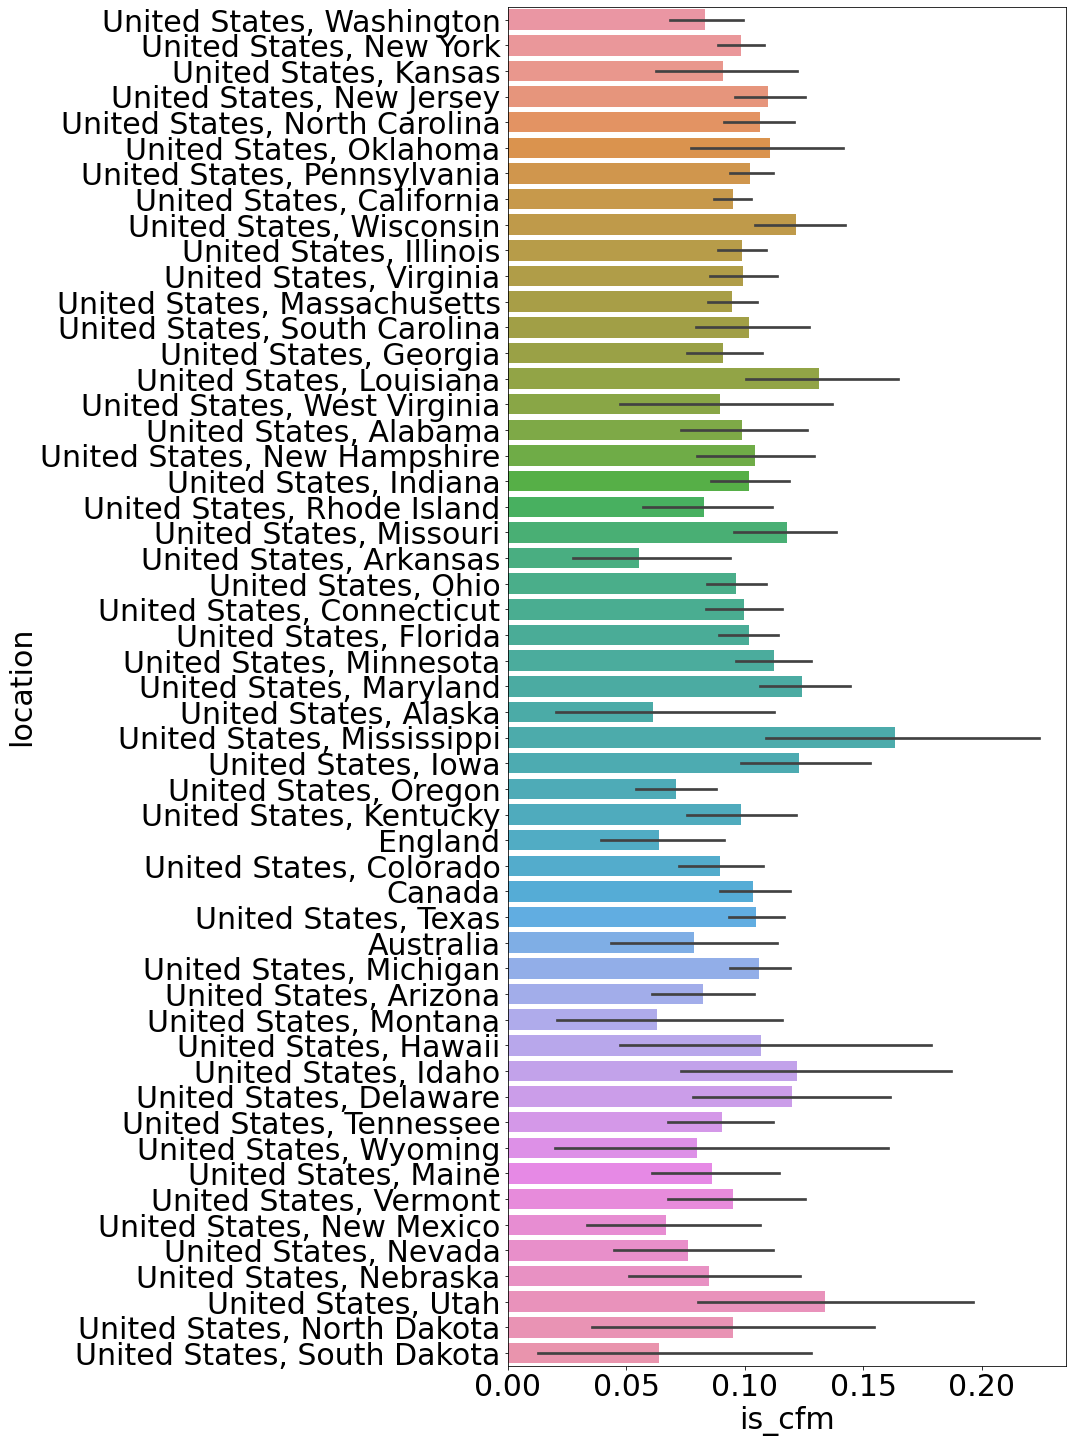

In [15]:
plt.figure(figsize=(10,25))
sns.barplot(data=users_ddf, x='is_cfm', y='location')

<AxesSubplot:xlabel='exp_score', ylabel='location'>

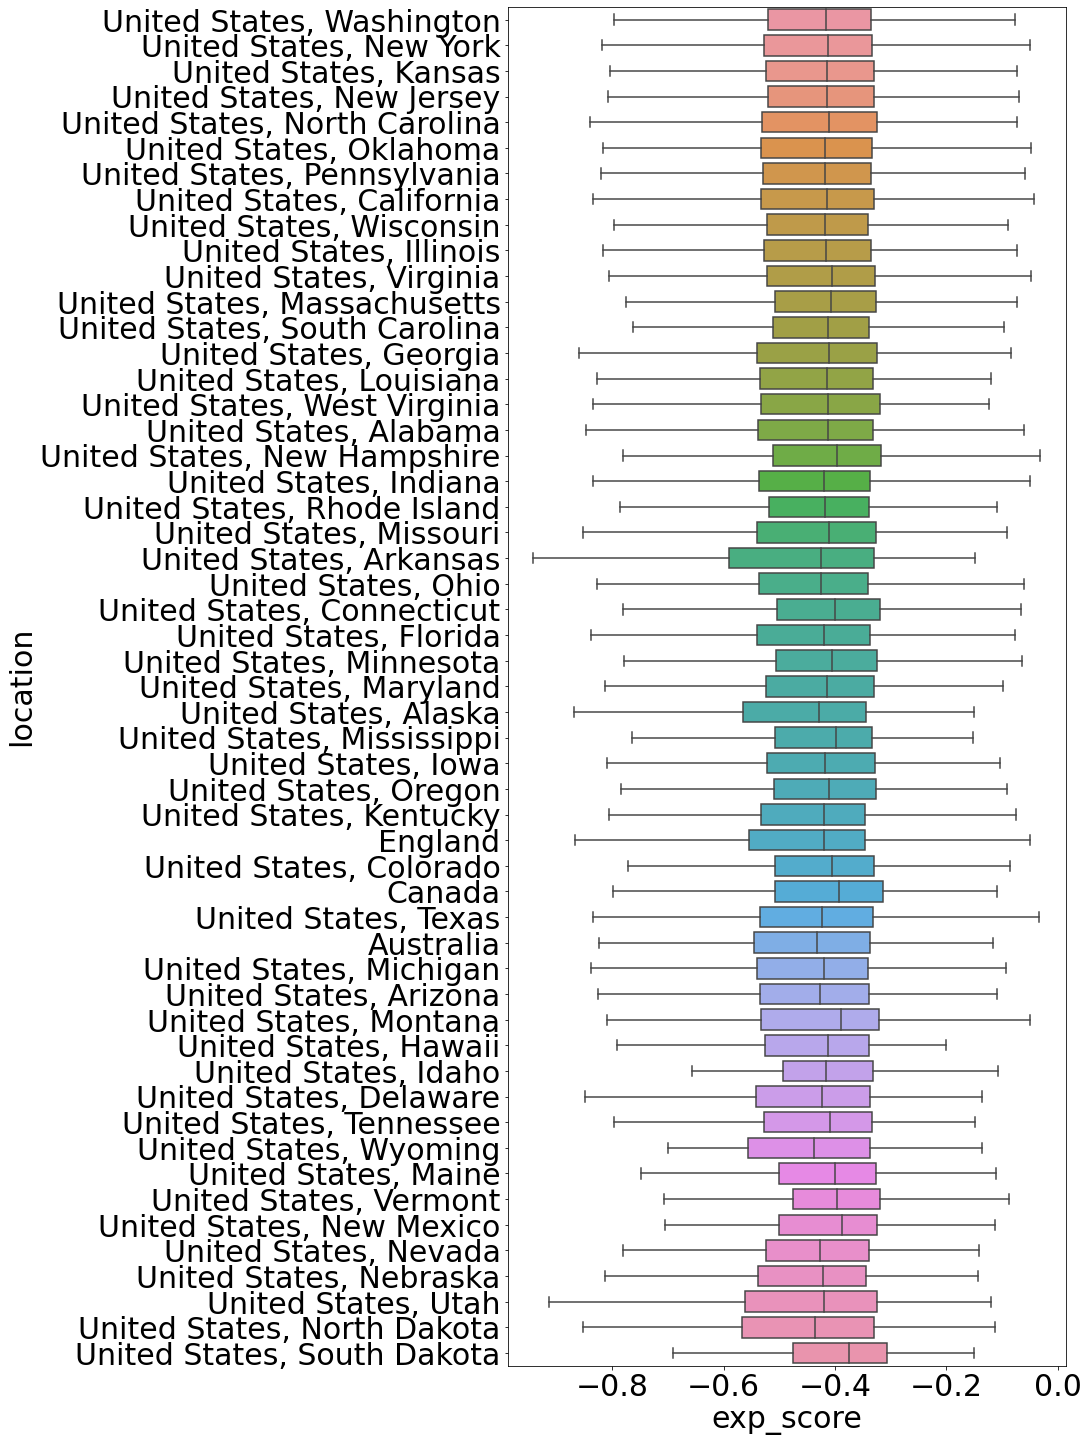

In [16]:
plt.figure(figsize=(10,25))
sns.boxplot(data=users_ddf, x="exp_score", y="location",showfliers = False)

<AxesSubplot:xlabel='is_exp', ylabel='location'>

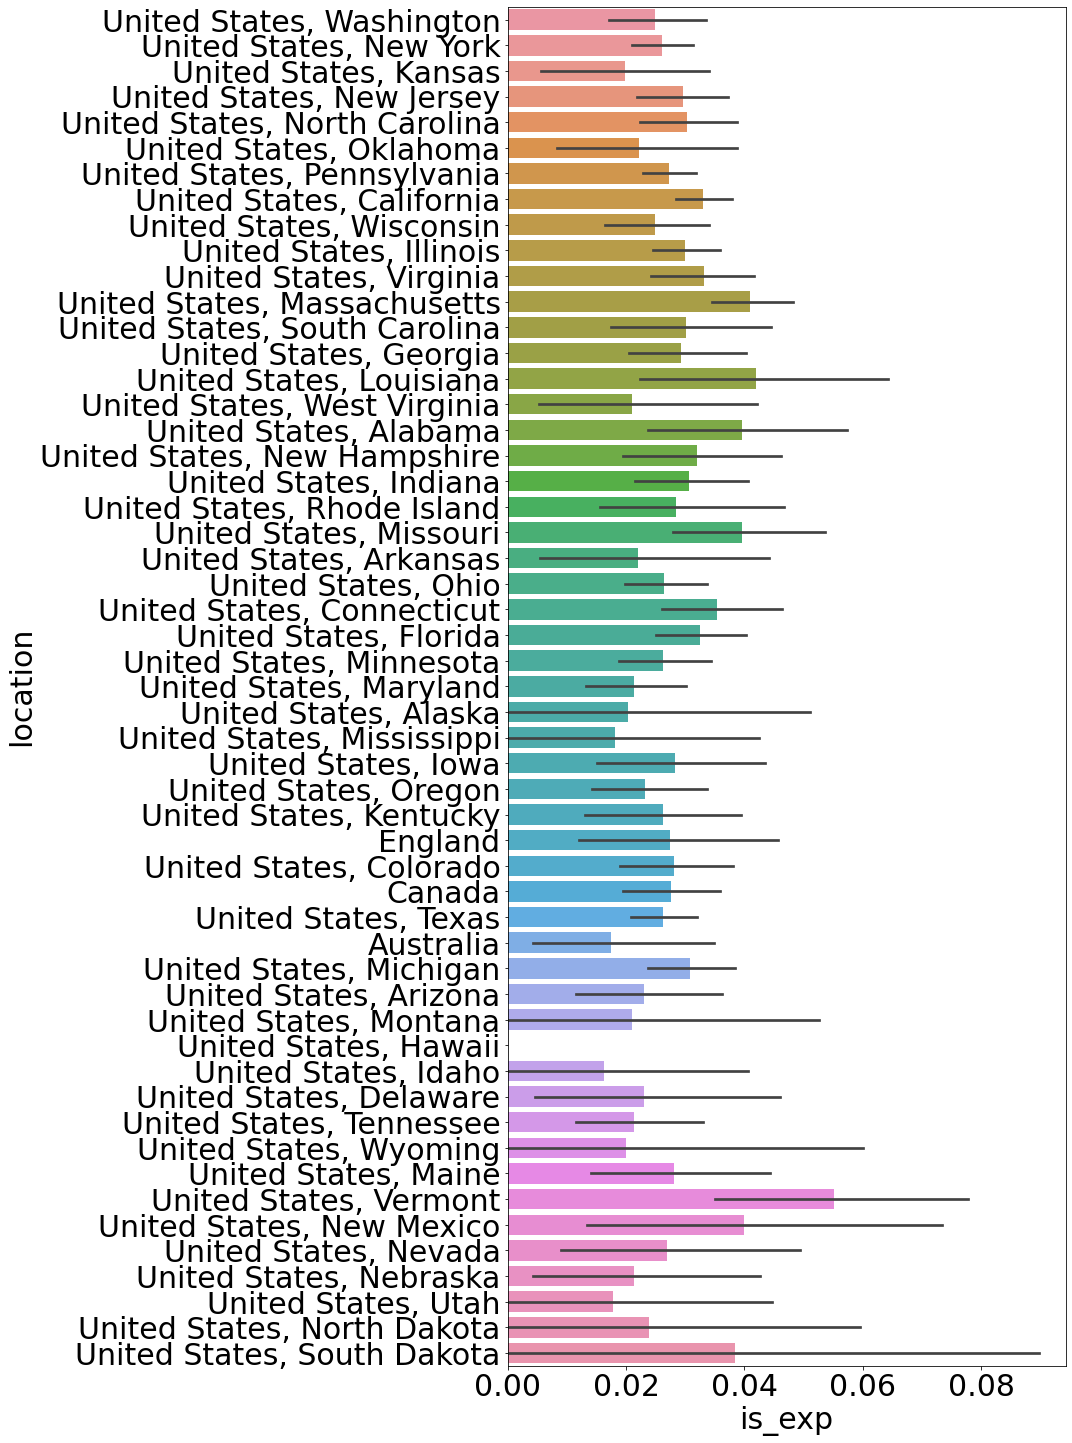

In [17]:
plt.figure(figsize=(10,25))
sns.barplot(data=users_ddf, x='is_exp', y='location')

<AxesSubplot:xlabel='xpl_score', ylabel='location'>

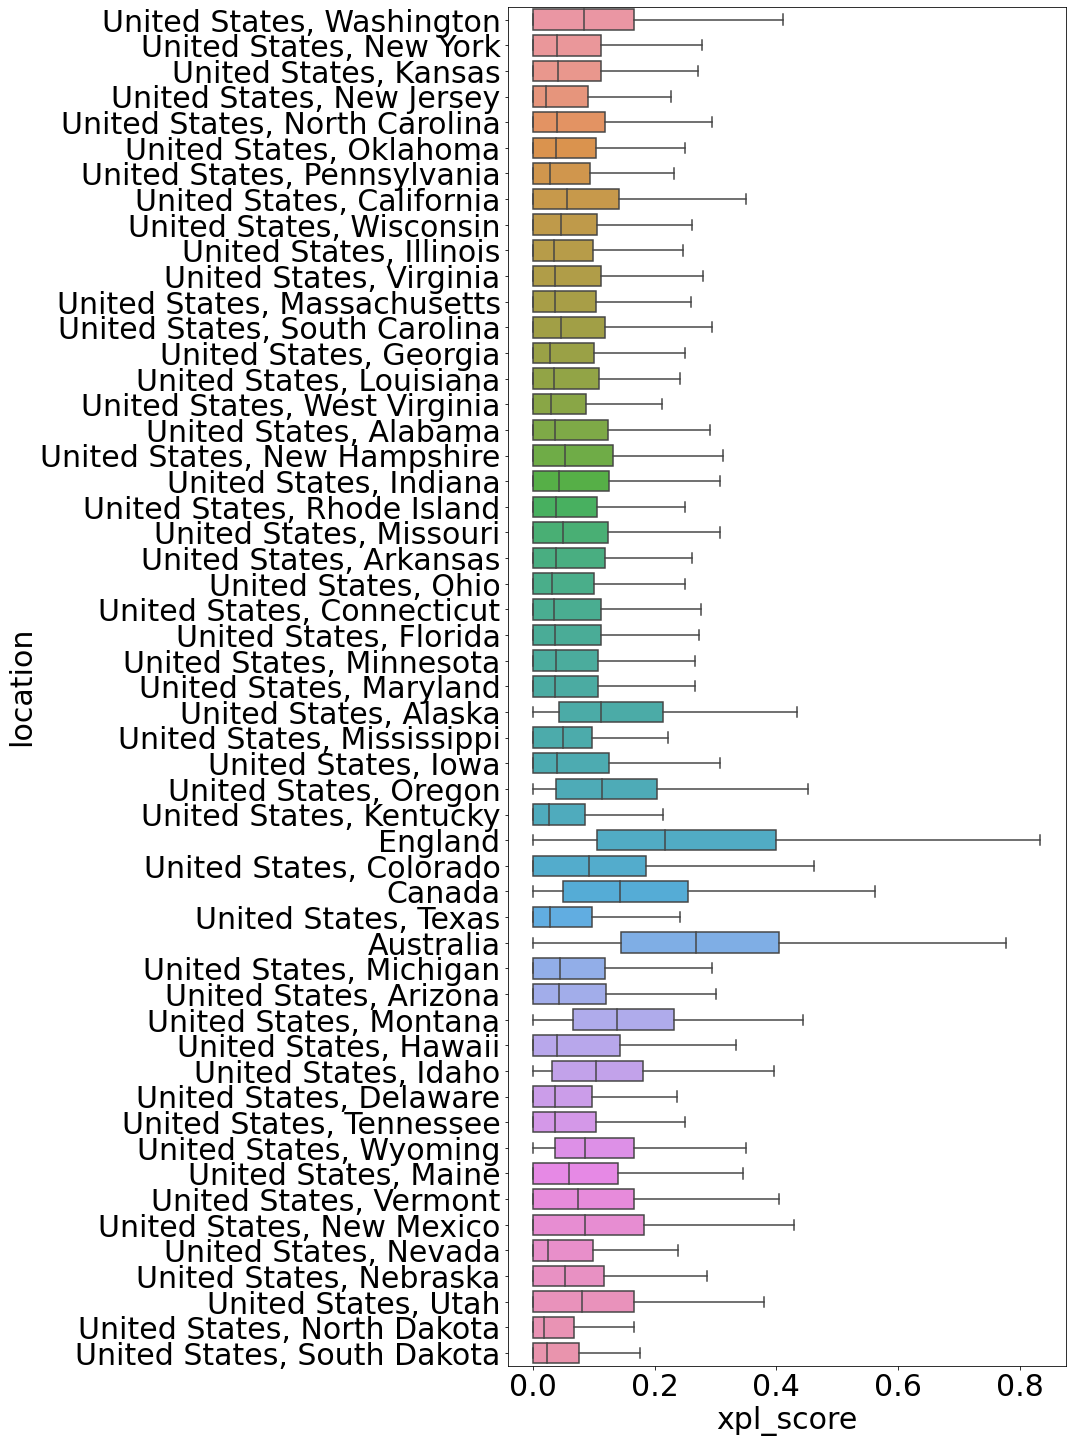

In [18]:
plt.figure(figsize=(10,25))
sns.boxplot(data=users_ddf, x="xpl_score", y="location",showfliers = False)

<AxesSubplot:xlabel='is_xpl', ylabel='location'>

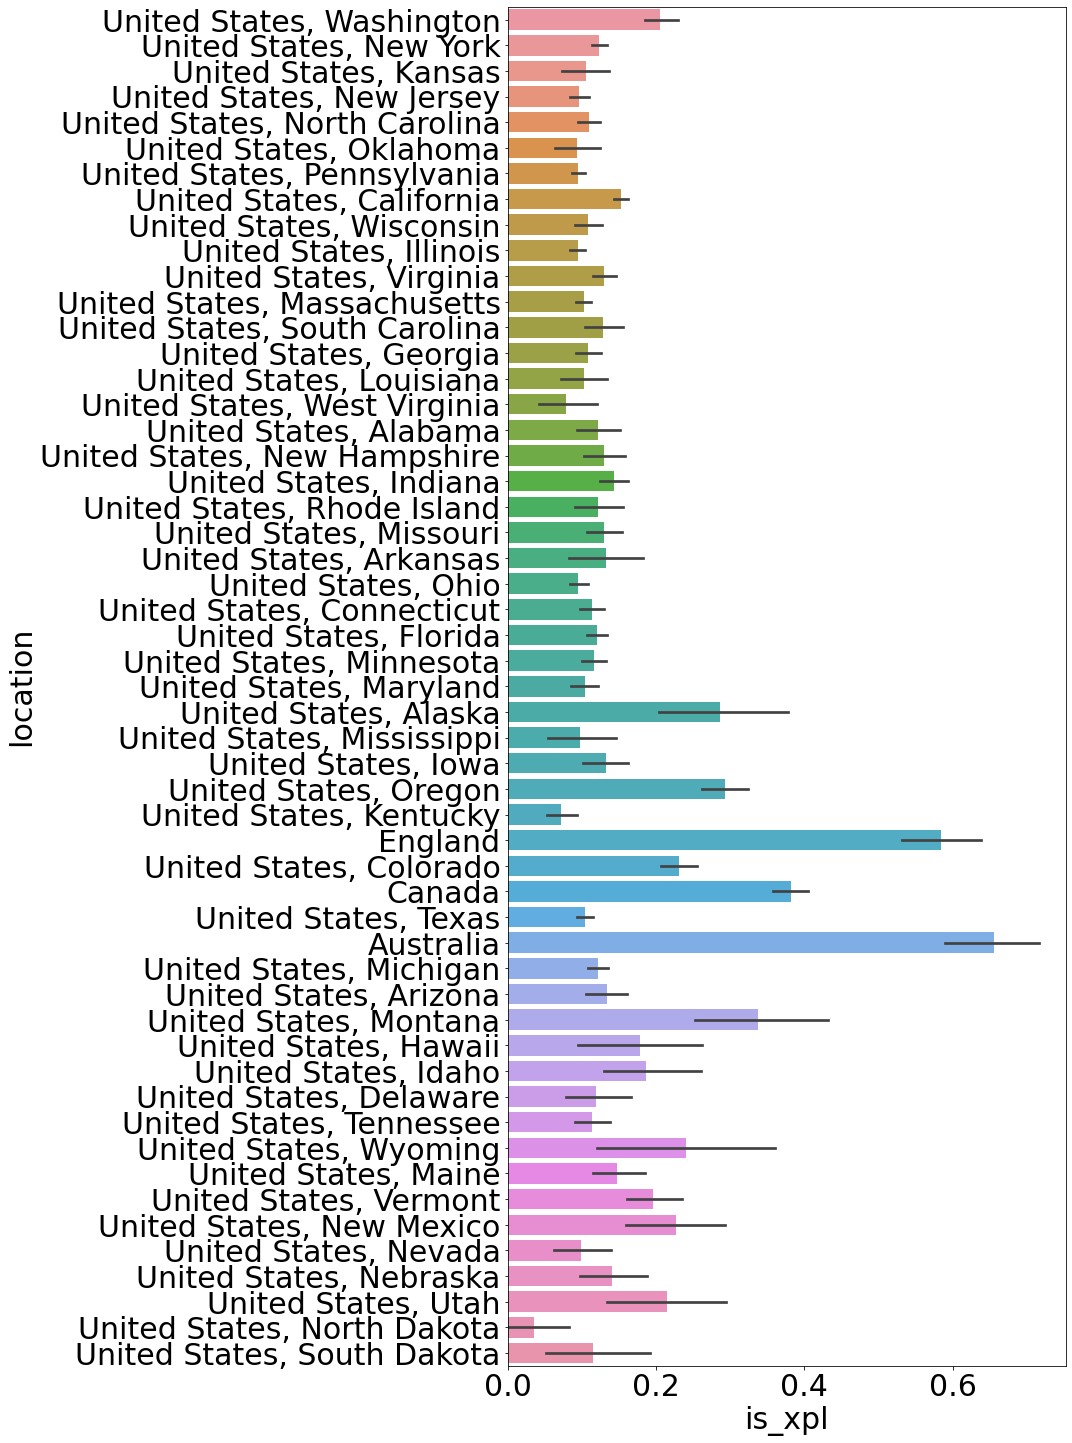

In [19]:
plt.figure(figsize=(10,25))
sns.barplot(data=users_ddf, x='is_xpl', y='location')

<AxesSubplot:xlabel='adv_score', ylabel='location'>

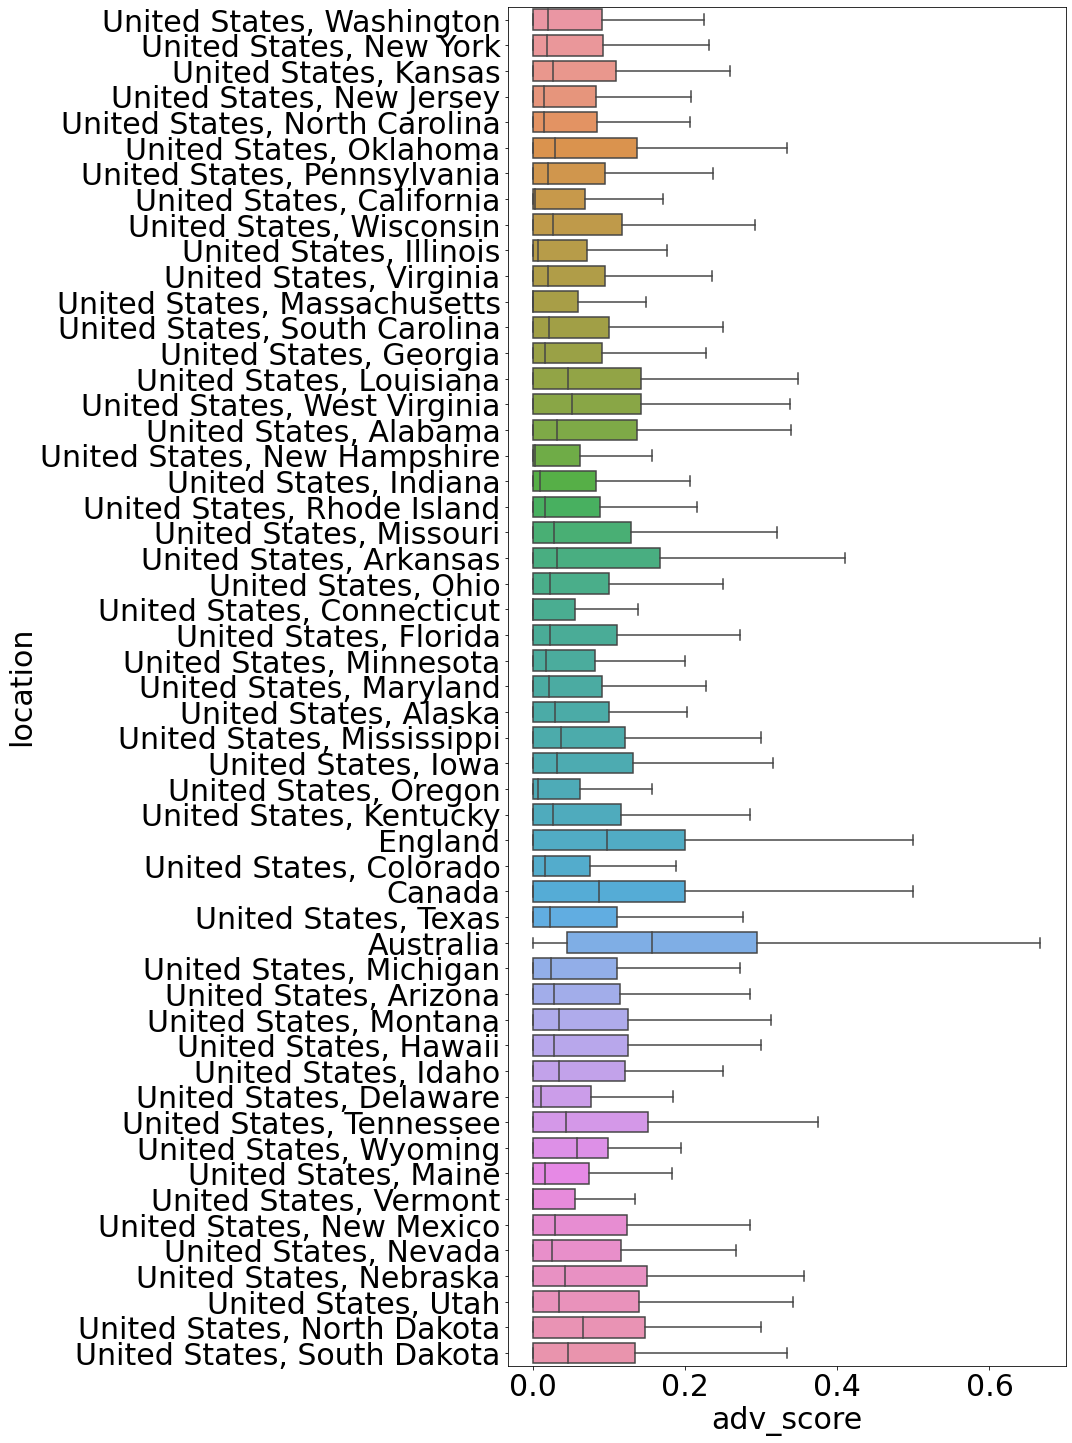

In [20]:
plt.figure(figsize=(10,25))
sns.boxplot(data=users_ddf, x="adv_score", y="location",showfliers = False)

<AxesSubplot:xlabel='is_adv', ylabel='location'>

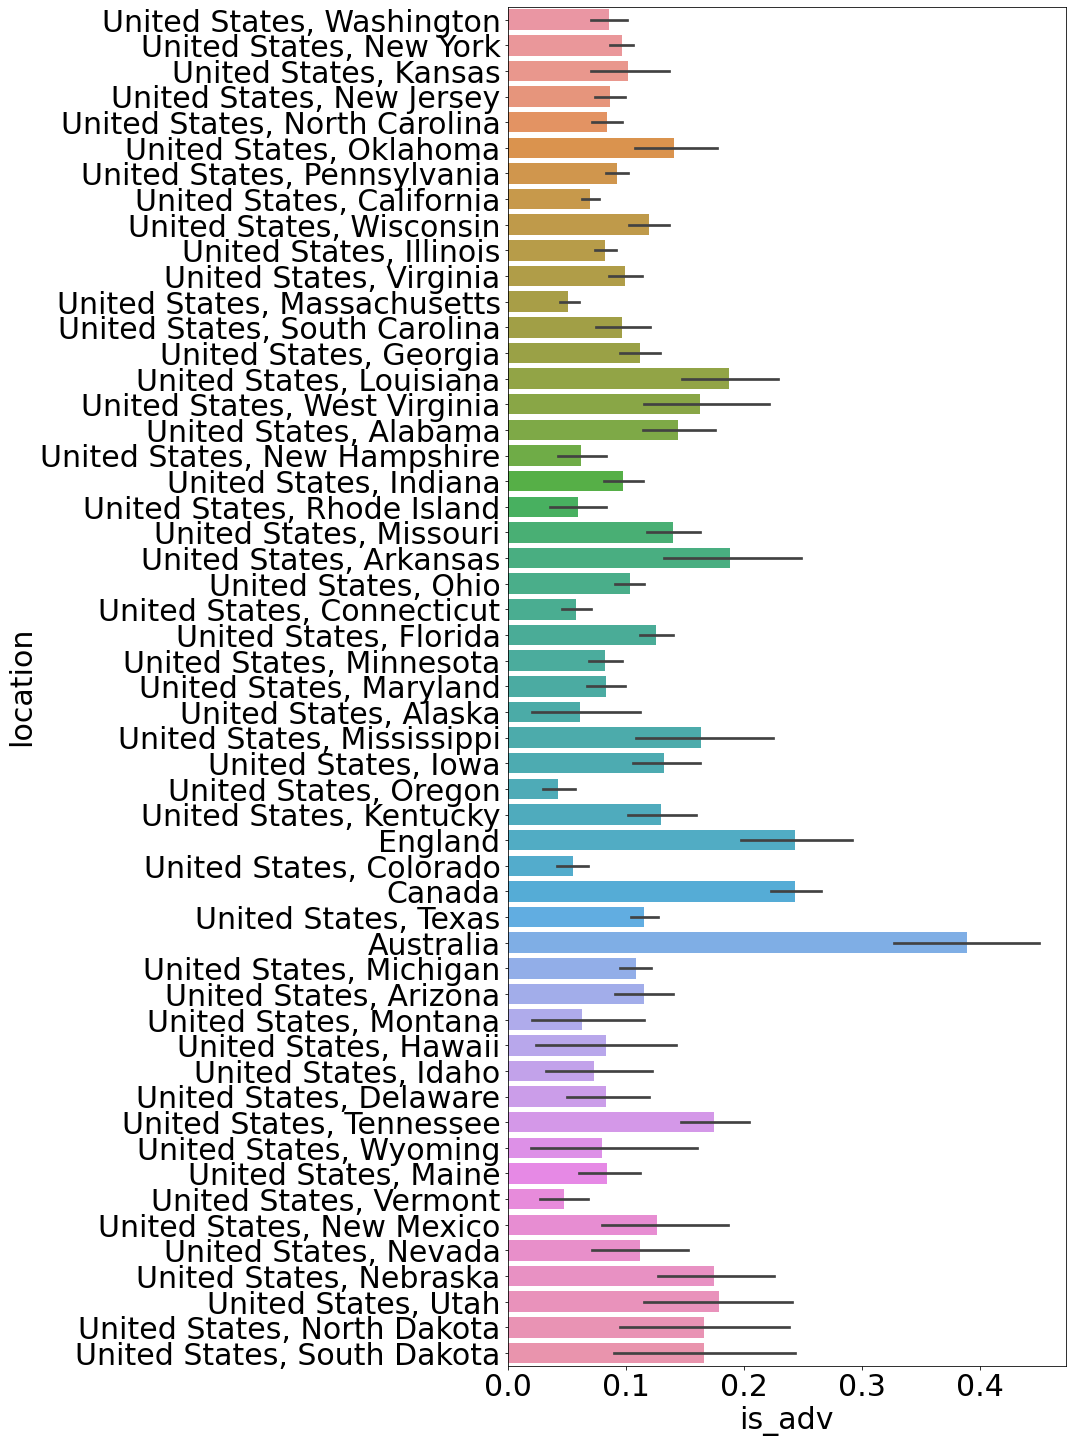

In [21]:
plt.figure(figsize=(10,25))
sns.barplot(data=users_ddf, x='is_adv', y='location')